DEVELOPER SURVEY ANALYSIS - NOTEBOOK


In [1]:
from platform import python_version
python_version()

'3.9.7'


# Udacity Data Science Nanodegree Program
## Project 1. Stack Overflow Developer Survey Blog Post 

author: Andrew Nachtigal  

> #### Table of Contents
> <ul>
> <li><a href="#intro">Introduction</a></li>
> <li><a href="#Question 1">Question 1</a></li>
> <li><a href="#Question 2">Question 2</a></li> 
> <li><a href="#Question 3">Question 3</a></li> 
> <li><a href="#conclusions">Conclusions</a></li>
> </ul>

<a id='intro'></a>
## Introduction   
This purpose of this project is to pose (and answer) three questions using data from the 2020 Stack Overflow Developer Survey.

__The Data Science Process__  
Data Science is the process of Gathering, Assessing, Cleaning, Analyzing, Modeling, and Visualizing data.

__Data Description__  
Each year, Stack Overflow surveys thousands of developers and data workers seeking information ranging from technologies and behavior to lifestyle and diversity.  

Three questions are asked regarding the data:

> Q1. Can we distinguish between data roles and developer roles?  
    > Features including Compensation, and Education Level are examined.
>
> Q2. How satisfied are data and developer roles with their jobs?
>
> Q3. Can predictors of job satisfaction be modeled through machine learning?


In [2]:
# import data analysis & graph packages
import pandas as pd
import numpy as np

import zipfile
import glob
import sys
import os
import re

import requests
from io import BytesIO
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# import machine learning packages
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

#from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV


In [4]:
# import survey data

# data directory
folder_name = 'sof-survey-data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# download developer survey file
survey_results_url = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2020.zip'
print(survey_results_url)
response = requests.get(survey_results_url)

# open zip file and return readable and writeable view
zipDoc = zipfile.ZipFile(BytesIO(response.content))

# save extracted zip file
zipDoc.extractall(folder_name)


https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2020.zip


In [5]:
# make plot directory
folder_name = 'plots'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    

In [6]:
# import data
df = pd.read_csv('./sof-survey-data/survey_results_public.csv')
schema = pd.read_csv('./sof-survey-data/survey_results_schema.csv')


In [7]:
# import schema survey questions
schema_fname =  './sof-survey-data/survey_results_schema.csv'
schema_df = pd.read_csv(schema_fname, index_col='Column')
schema = schema_df.QuestionText


### Survey Questions


In [8]:
 schema

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

<a id='Question 1'></a>
## Q1 Can we distinguish between data roles and developer roles? 

## Developer Roles


In [9]:
# drop NaNs
df = df.dropna(subset=['DevType'], axis=0)


In [10]:
# unique DevType roles
DevRoles = df.DevType.unique()
DevStr = []
for i in range(len(DevRoles)):
    '''Create list of unique developer roles found in survey responses under 'DevType'.
        Iterate over DevType column
    '''
    role = DevRoles[i].split(";")
    DevStr.append(role)
DevTypes = set(list(chain.from_iterable(DevStr)))
DevTypes


{'Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'Scientist',
 'Senior executive/VP',
 'System administrator'}

In [11]:
# specify data and dev role markers
data_roles = ['Data or business analyst', 'Data scientist or machine learning specialist', 'Engineer, data']
dev_roles = ['Developer']


In [12]:
# subset responses including developer roles
df_dev = df[df['DevType'].str.contains('|'.join(dev_roles), na=False) == True].copy(deep=True)

# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [13]:
# drop responses including data roles
df_dev = df_dev[~df_dev['DevType'].str.contains('|'.join(data_roles), na=False) == True]


In [14]:
# shape of developer roles dataset
print('dev roles dataframe contains', np.shape(df_dev)[0], 'rows and', np.shape(df_dev)[1], 'columns.')


dev roles dataframe contains 38631 rows and 61 columns.


## Data Roles


In [15]:
# subset all responses including data
df_data = df[df['DevType'].str.contains('|'.join(data_roles), na=False) == True].copy(deep=True)


In [16]:
# shape of data roles dataframe
print('data roles dataframe contains', np.shape(df_data)[0], 'rows and', 
      np.shape(df_data)[1], 'columns.')


data roles dataframe contains 8726 rows and 61 columns.


### Add Indicator Column for developer and data roles: 'is_data_role'

In [17]:
# set indicator column for data and dev roles
df_data['is_data_role'] = 'data'
df_dev['is_data_role'] = 'dev'


In [18]:
# join data and developer data
df = pd.concat([df_data, df_dev])

# reset index
df = df.reset_index(drop=True)


In [19]:
df.head(3)


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,is_data_role
0,22,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,Indian rupee,...,Appropriate in length,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,10,2,data
1,25,I am a developer by profession,No,NaN,25,Monthly,NaN,NaN,Portugal,European Euro,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,23,18,data
2,30,I am a developer by profession,Yes,NaN,14,Yearly,30000.0,38778.0,United Kingdom,Pound sterling,...,Too long,No,"Information systems, information technology, o...",Express;React.js;Vue.js,Express;Vue.js,A lot less welcome now than last year,37.0,4,2,data


## Data & Developer Role Feature Exploration

In [20]:
df.shape


(47357, 62)

In [21]:
# column datatypes
pd.set_option('display.max_rows', 10)
display(df.dtypes)


Respondent         int64
MainBranch        object
Hobbyist          object
Age              float64
Age1stCode        object
                  ...   
WelcomeChange     object
WorkWeekHrs      float64
YearsCode         object
YearsCodePro      object
is_data_role      object
Length: 62, dtype: object

## Data vs. Developer Roles

* explore statistical/visual similarities and differences
* select features manually

**Features Examined**

Three features are manually selected to inspect differences between developer and data roles.

* Age
* Converted Comp
* EdLevel

**Missing Values**

Missing data are a rule rather than an exception in quantitative research. Missing data can reduce the representativeness of the sample and distort inferences about the population. Therefore the decision of how to handle missing data may affect the quality of data inferences and conclusions. 

The ratio of missing data is considered. If a large percent of the data is missing, additional analysis may be necessary


In [22]:
# inspect features
df_diff = df[['Age','ConvertedComp','EdLevel']]
df_diff.head()


,Age,ConvertedComp,EdLevel
0,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
1,NaN,NaN,"Associate degree (A.A., A.S., etc.)"
2,NaN,38778.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
3,34.0,77556.0,Some college/university study without earning ...
4,32.0,55893.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"


In [23]:
# ratio of missing values
round((df_diff.isnull().sum()/len(df_diff))*100,2)


Age              20.47
ConvertedComp    29.74
EdLevel           1.99
dtype: float64

**Missing Values**. 
The age and compensation columns have a large ratio of missing values, which may affect inference or modeling results. Missing values for these features will be imputed with the average value.


# Age

In [24]:
# describe Age column
print(df.Age.describe())

# fill missing values
df['Age'].fillna(int(df['Age'].mean()), inplace=True)


count    37662.000000
mean        31.805677
std          8.795051
min          1.000000
25%         26.000000
50%         30.000000
75%         36.000000
max        279.000000
Name: Age, dtype: float64


In [25]:
# check missing values
print('missing values',df['Age'].isna().sum()) 


missing values 0


In [26]:
# unique Age responses
print(list(df.Age.unique()))


[31.0, 34.0, 32.0, 53.0, 38.0, 25.0, 28.0, 23.0, 41.0, 36.0, 30.0, 26.0, 27.0, 43.0, 24.0, 35.0, 59.0, 37.0, 51.0, 22.0, 42.0, 52.0, 46.0, 48.0, 29.0, 20.0, 40.0, 33.0, 49.0, 57.0, 56.0, 21.0, 54.0, 50.0, 47.0, 55.0, 39.0, 17.0, 44.0, 63.0, 19.0, 45.0, 58.0, 18.0, 73.0, 60.0, 62.0, 16.0, 61.0, 72.0, 67.0, 15.0, 3.0, 64.0, 85.0, 69.0, 66.0, 71.0, 74.0, 80.0, 1.0, 68.0, 13.0, 99.0, 14.0, 65.0, 12.0, 95.0, 75.0, 49.5, 70.0, 26.8, 84.0, 76.0, 32.5, 96.0, 26.5, 24.5, 14.7, 34.5, 77.0, 279.0, 94.0, 22.5, 27.5, 78.0, 7.0, 10.0, 31.5, 39.5, 83.0, 23.4]


## Age Histogram

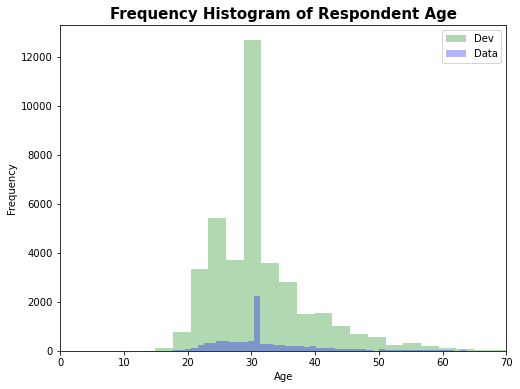

In [27]:
# Age histogram
AgeDev = df.loc[df.is_data_role=='dev', 'Age']
AgeData = df.loc[df.is_data_role=='data', 'Age']

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=100)
fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(AgeDev, **kwargs, color='g', label='Dev')
plt.hist(AgeData, **kwargs, color='b', label='Data')
plt.gca().set(ylabel='Frequency', xlabel='Age')
plt.title('Frequency Histogram of Respondent Age', fontsize= 15, fontweight='bold')
plt.xlim(0,70)
plt.legend();

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig('plots/01-Frequency Histogram of Respondent Age.png', bbox_inches='tight')


In [28]:
# Age: Data mean vs Dev mean 
print('mean Age for data role:', round(AgeData.mean(),2))  
print('mean Age for dev role:',  round(AgeDev.mean(),2))


mean Age for data role: 32.5
mean Age for dev role: 31.45


**Age Distribution Conclusion**
* Mean Age is slightly higher for developers.

# Converted Comp


In [29]:
# describe Age column
print(df.ConvertedComp.describe())

# fill missing values
df['ConvertedComp'].fillna(int(df['ConvertedComp'].mean()), inplace=True)



count    3.327500e+04
mean     1.027512e+05
std      2.264399e+05
min      0.000000e+00
25%      2.422800e+04
50%      5.318400e+04
75%      9.438400e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64


In [30]:
# missing values
print('missing Compensation',df['ConvertedComp'].isna().sum()) 
# print('ratio missing', df['ConvertedComp'].isna().sum() / len(df['ConvertedComp'])*100)


missing Compensation 0


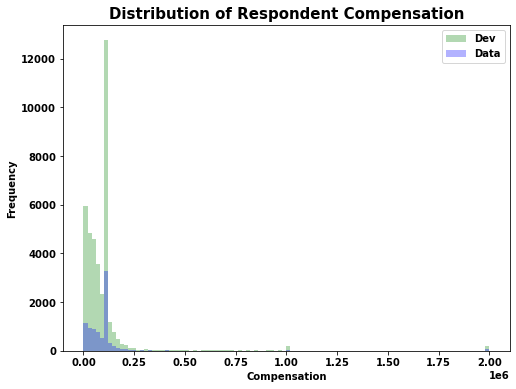

In [31]:
# Distribution of Dev and Data Compensation

# For evaluation of developer and data role compensation, missing values are dropped.

CompDev = df.loc[df.is_data_role=='dev', 'ConvertedComp'].dropna()
CompData = df.loc[df.is_data_role=='data', 'ConvertedComp'].dropna()

kwargs = dict(histtype='barstacked', alpha=0.3, bins=100)
fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(CompDev, **kwargs, color='g', label='Dev')
plt.hist(CompData, **kwargs, color='b', label='Data')
plt.gca().set(ylabel='Frequency', xlabel='Compensation')
plt.title('Distribution of Respondent Compensation', fontsize= 15, fontweight='bold')
plt.legend();

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.savefig('plots/02-Distribution of Respondent Compensation.png', bbox_inches='tight')


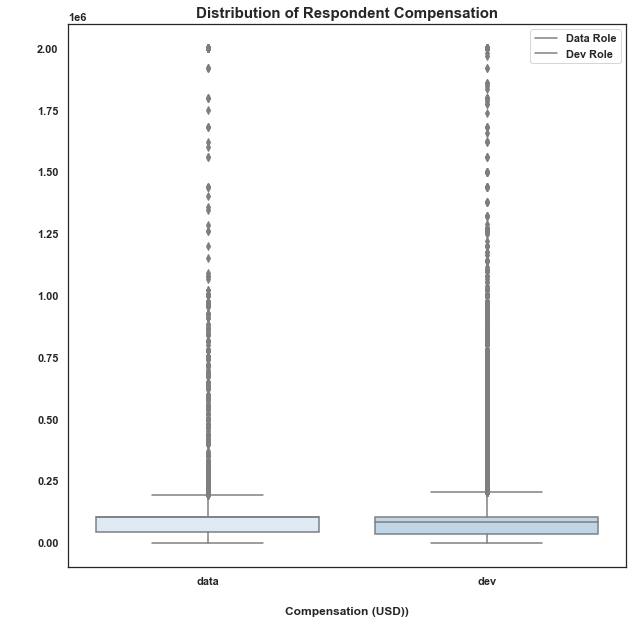

In [32]:
# vertical boxplot
df_z = df[df['ConvertedComp'].notnull()]

sns.set(style="white", palette="Blues", color_codes=True)
plt.figure(figsize=[10, 10])
#df['comp_log'] = np.log(df['ConvertedComp'].values)
#ax = sns.boxplot(x='is_data_role', y='comp_log', data=df)
ax = sns.boxplot(x='is_data_role', y='ConvertedComp', data=df_z)
plt.title('Distribution of Respondent Compensation', fontsize= 15, fontweight='bold')
ax.set_xlabel("Compensation (USD))", labelpad=20, weight='bold', size=12)
ax.set_ylabel(" ", labelpad=20, weight='bold', size=12)
ax.legend(['Data Role', 'Dev Role'])

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig('plots/03-Distribution of Respondent Compensation.png', bbox_inches='tight')


In [33]:
# mean comensation: Data vs Dev
print('data role mean compensation is', round(CompData.mean()))
print('dev role mean compensation is',  round(CompDev.mean()))
print("")
print('Average Data Roles earn more by $', round(CompData.mean()) - round(CompDev.mean()))


data role mean compensation is 111050
dev role mean compensation is 100877

Average Data Roles earn more by $ 10173


**Compensation Conclusion**
* Average data roles pay 15% more than Dev roles.
* Using imputed average compensation, Data roles pay on average 11% more.


# Education (EdLevel)

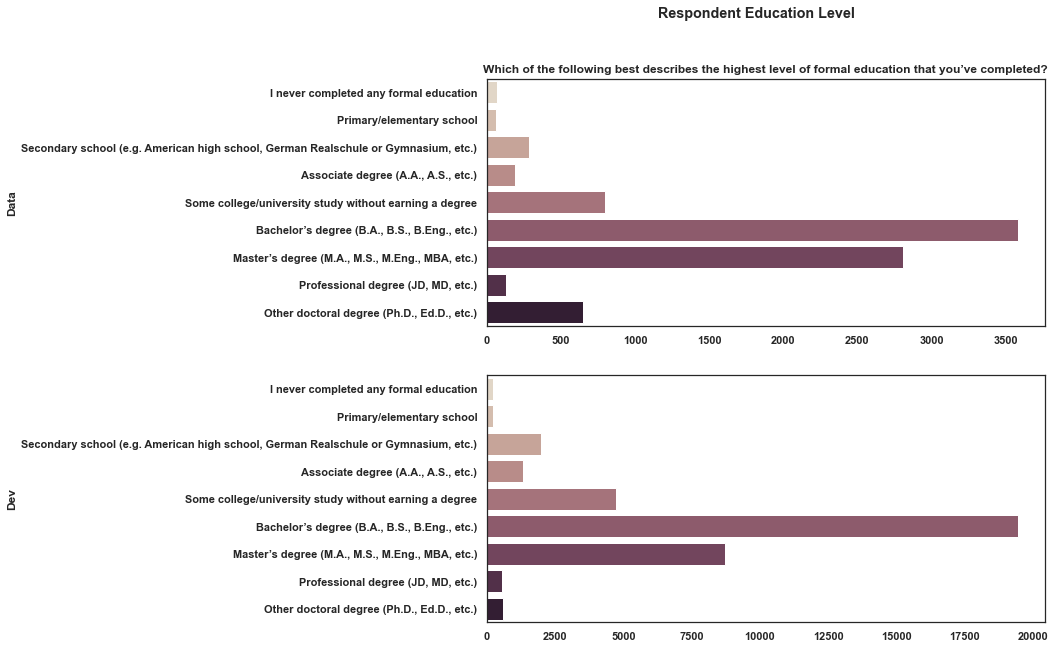

In [34]:
# plot education levels
# respondent education level

educ_order = ['I never completed any formal education',
                'Primary/elementary school',
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                'Associate degree (A.A., A.S., etc.)',
                'Some college/university study without earning a degree',
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                'Professional degree (JD, MD, etc.)',
                'Other doctoral degree (Ph.D., Ed.D., etc.)']

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
fig.suptitle('Respondent Education Level',fontweight="bold")

# Data
plt.subplot(2, 1, 1)
sns.countplot(ax=axes[0], y=df_data.EdLevel, order=educ_order, palette="ch:.25")
axes[0].set_title('Data')
plt.title(schema['EdLevel'],fontweight="bold")
plt.xlabel(None);
plt.ylabel('Data');

# Dev
plt.subplot(2, 1, 2)
sns.countplot(ax=axes[1], y=df_dev.EdLevel, order=educ_order, palette="ch:.25")
axes[1].set_title('Dev')
plt.title(None)
plt.xlabel(None)
plt.ylabel('Dev');

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig('plots/04-Respondent Education Level.png', bbox_inches='tight')


**Education Level for Data and Dev Roles: Formal Education Ratio**

In [35]:
# make edlev index key list
edlev_index = ['associate','bachelors', 'no degree', 'masters', 'doctoral', 'elementary', 'professional', 
               'secondary', 'some college']


In [36]:
# data edlev
data_edlev_val = pd.DataFrame(df.loc[df['is_data_role']=='data']['EdLevel'].value_counts(sort=False, dropna=True))
data_edlev_val.sort_index(inplace=True)
# convert edlev to dict
data_edlev_dict = dict(zip(edlev_index, data_edlev_val['EdLevel'].to_list()))


In [37]:
# data total
data_edlev_total = data_edlev_val.sum()
# data bachelor's
data_bach_ratio = data_edlev_dict['bachelors'] / data_edlev_total
# data pgrad
data_pgrad_ratio = (sum([data_edlev_dict.get(k) for k in ["masters", "doctoral", 
                                                          "professional"]])) / data_edlev_total


In [38]:
# dev edlev
dev_edlev_val = pd.DataFrame(df.loc[df['is_data_role']=='dev']['EdLevel'].value_counts(sort=False, dropna=True))
dev_edlev_val.sort_index(inplace=True)
# convert dev edlev to dictionary
dev_edlev_dict = dict(zip(edlev_index, dev_edlev_val['EdLevel'].to_list()))


In [39]:
# dev total
dev_edlev_total = dev_edlev_val.sum()
# dev bachelor's
dev_bach_ratio = dev_edlev_dict['bachelors'] / dev_edlev_total
# dev pgrad
dev_pgrad_ratio = (sum([dev_edlev_dict.get(k) for k in ["masters", "doctoral", 
                                                        "professional"]])) / dev_edlev_total


In [40]:
# formal education ratios
print('data bachelors ratio is:', round(data_bach_ratio[0],4))
print('data postgrad ratio is:', round(data_pgrad_ratio[0],4))
print('dev bachelors ratio is:', round(dev_bach_ratio[0],4))
print('dev postgrad ratio is:', round(dev_pgrad_ratio[0],4))


data bachelors ratio is: 0.4177
data postgrad ratio is: 0.4182
dev bachelors ratio is: 0.5143
dev postgrad ratio is: 0.2616


**Education Conclusion**
* College degrees are very common among both data and developer roles.
* Bachelor's degrees dominate among developers while post-graduate degrees are twice as common for data roles.

<a id='Question 2'></a>
## Q2 How satisfied are data and developer roles with their jobs?

In [41]:
# describe job satisfaction column: count, unique, nan rows, etc
print(df.JobSat.describe())

# check for null values in jobsat column
print('dataset contains', df['JobSat'].isna().sum(), 'nan values')


count              43043
unique                 5
top       Very satisfied
freq               13825
Name: JobSat, dtype: object
dataset contains 4314 nan values


**Plot Job Satisfaction by Developer Roles**

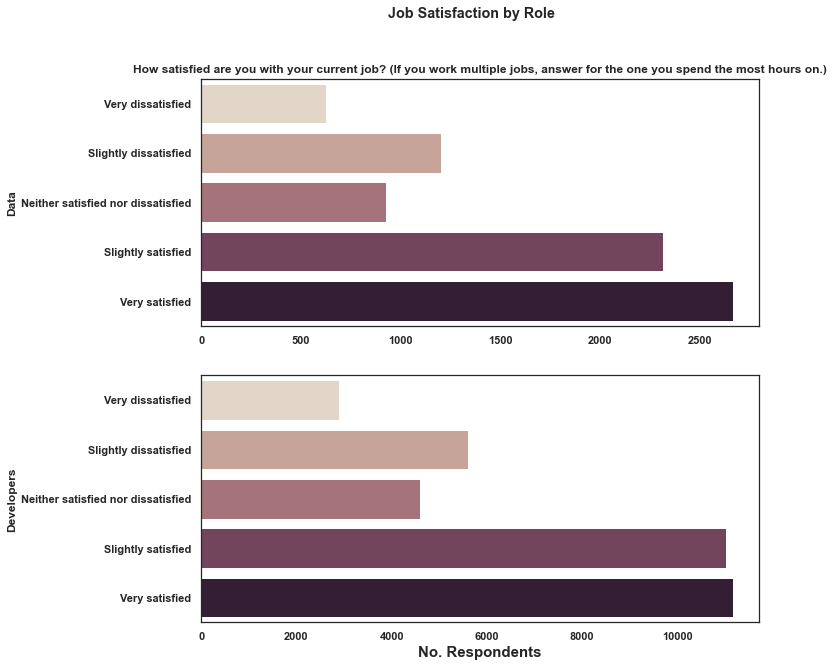

In [42]:
# plot job satisfaction for developer roles
jobsat_order = ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 
                'Slightly satisfied', 'Very satisfied']

# respondent education level
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
fig.suptitle('Job Satisfaction by Role',fontweight="bold")

# Data
plt.subplot(2, 1, 1)
sns.countplot(y = df_data.JobSat, order = jobsat_order, palette = "ch:.25")
plt.title(schema['JobSat'], fontweight="bold")
plt.xlabel(None)
plt.ylabel('Data');

# Dev
plt.subplot(2, 1, 2)
sns.countplot(y = df_dev.JobSat, order = jobsat_order, palette = "ch:.25")
plt.xlabel('No. Respondents', size = 15)
plt.ylabel('Developers');

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.savefig('plots/05-Job Satisfaction by Role.png', bbox_inches='tight')


In [43]:
# Job Satisfaction Percent - Data
total = df_data['JobSat'].count()
jobsat_percent = df_data['JobSat'].value_counts()/total
jobsat_percent.round(2)


Very satisfied                        0.34
Slightly satisfied                    0.30
Slightly dissatisfied                 0.16
Neither satisfied nor dissatisfied    0.12
Very dissatisfied                     0.08
Name: JobSat, dtype: float64

In [44]:
# Job Satisfaction Percent - Developers
total = df_dev['JobSat'].count()
jobsat_percent = df_dev['JobSat'].value_counts()/total
jobsat_percent.round(2)


Very satisfied                        0.32
Slightly satisfied                    0.31
Slightly dissatisfied                 0.16
Neither satisfied nor dissatisfied    0.13
Very dissatisfied                     0.08
Name: JobSat, dtype: float64

**Conclusion: Job Satisfaction by Role**  
Data Role: 64% satisfied, 36% not satisfied  
Dev Role: 63% satisfied, 37% not satisfied


## Working Hours Per Week (WorkWeekHrs)


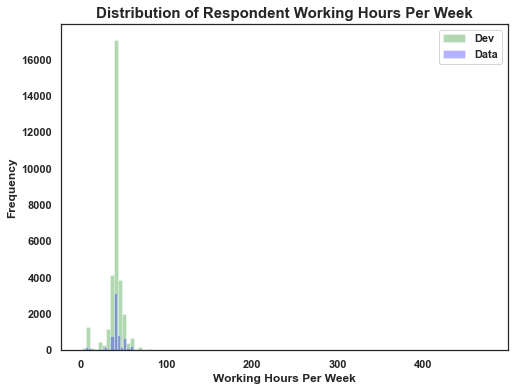

In [45]:
# Distribution of Working Hours by Role

WorkDev = df.loc[df.is_data_role=='dev', 'WorkWeekHrs'].dropna()
WorkData = df.loc[df.is_data_role=='data', 'WorkWeekHrs'].dropna()

kwargs = dict(histtype='barstacked', alpha=0.3, bins=100)
fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(WorkDev, **kwargs, color='g', label='Dev')
plt.hist(WorkData, **kwargs, color='b', label='Data')
plt.gca().set(ylabel='Frequency', xlabel='Working Hours Per Week')
plt.title('Distribution of Respondent Working Hours Per Week', fontsize= 15, fontweight='bold')
plt.legend();

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.savefig('plots/06-Distribution of Working Hours by Role.png', bbox_inches='tight')


**Work Week Hours Conclusion**
Mostly follows a normal curve but with some extreme outliers, possibly indicating respondent's feeling of extreme work or over-work.


<a id='Question 3'></a>
## Q3 Can we classify good predictors of job satisfaction with machine learning?


**FEATURE MODELING**
* remove unemployed
* method for determining useful features / feature selection
    * trim features by intuition
    * programmaticaly remove uncorrelated columns
* parse feature columns into useful types
* expand columns with list-like structures
* consider distribution of numeric features
* manage missing values
* encode categorical features

**Missing Values**. 

For modeling purposes, values will be dropped. 

Because the data set is large, missing values can be dropped while retaining sufficient responses to retain significance. Additionally, imputing a large number of missing values may scew model results.


In [46]:
# import data
df = pd.read_csv('./sof-survey-data/survey_results_public.csv')


In [47]:
# all features
df.columns


Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

# DATA PREPARATION
* drop unemployed responses
* manually drop feature columns that are not of interest
* drop NaN values  
* encode categorical feature columns
* drop string object columns
* reset index


In [48]:
# drop unemployed responses

df = df[df.Employment.isin(['Employed full-time', 'Independent contractor, freelancer, or self-employed', 
                            'Employed part-time'])]
 
# narrow feature set: drop column features that are not of interest
df = df[['Hobbyist', 'Age', 'Age1stCode','ConvertedComp','EdLevel','JobSat','JobFactors','JobSeek',
         'WorkWeekHrs','YearsCode','YearsCodePro']]


In [49]:
df.shape


(53159, 11)

### Model Features

In [50]:
list(df.columns)


['Hobbyist',
 'Age',
 'Age1stCode',
 'ConvertedComp',
 'EdLevel',
 'JobSat',
 'JobFactors',
 'JobSeek',
 'WorkWeekHrs',
 'YearsCode',
 'YearsCodePro']

In [51]:
# column datatypes
pd.set_option('display.max_rows', 75)
display(df.dtypes)


Hobbyist          object
Age              float64
Age1stCode        object
ConvertedComp    float64
EdLevel           object
JobSat            object
JobFactors        object
JobSeek           object
WorkWeekHrs      float64
YearsCode         object
YearsCodePro      object
dtype: object

## Categorical Feature Mappings


In [52]:
# categorical variable responses strings

EdLevel_strs = ['I never completed any formal education',
                'Primary/elementary school',
                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                'Associate degree (A.A., A.S., etc.)',
                'Some college/university study without earning a degree',
                'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
                'Professional degree (JD, MD, etc.)',
                'Other doctoral degree (Ph.D., Ed.D., etc.)']

JobSeek_strs = ['I am not interested in new job opportunities',
                 'I’m not actively looking, but I am open to new opportunities',
                 'I am actively looking for a job']


# Hobbyist

In [53]:
# describe data
print(df.Hobbyist.describe())

# check for null values
print('dataset contains', df['Hobbyist'].isna().sum(), 'nan values')


count     53159
unique        2
top         Yes
freq      40848
Name: Hobbyist, dtype: object
dataset contains 0 nan values


In [54]:
# 'Hobbyist' responses
print(list(df.Hobbyist.unique()))


['Yes', 'No']


In [55]:
# convert 'Hobbyist' to yes=1 or no=0
df['Hobbyist_bin'] = df.Hobbyist.map(dict(Yes=1, No=0))


In [56]:
df.Hobbyist_bin.head()


0    1
1    0
4    1
5    0
6    1
Name: Hobbyist_bin, dtype: int64

# Age

In [57]:
# describe age column
print(df.Age.describe())

# check for null values in jobsat column
print('dataset contains', df['Age'].isna().sum(), 'nan values')


count    38222.000000
mean        32.132991
std          8.922762
min          1.000000
25%         26.000000
50%         30.000000
75%         36.000000
max        279.000000
Name: Age, dtype: float64
dataset contains 14937 nan values


In [58]:
# 'Age' unique responses
print(list(df.Age.unique()))


[nan, 31.0, 36.0, 30.0, 22.0, 23.0, 49.0, 53.0, 27.0, 45.0, 25.0, 32.0, 24.0, 40.0, 39.0, 34.0, 19.0, 35.0, 38.0, 57.0, 28.0, 17.0, 44.0, 48.0, 20.0, 21.0, 26.0, 42.0, 29.0, 55.0, 37.0, 50.0, 41.0, 63.0, 33.0, 43.0, 18.0, 51.0, 60.0, 59.0, 62.0, 52.0, 46.0, 49.5, 56.0, 47.0, 71.0, 54.0, 70.0, 61.0, 26.8, 64.0, 72.0, 58.0, 65.0, 84.0, 15.0, 73.0, 68.0, 16.0, 99.0, 74.0, 69.0, 13.0, 67.0, 85.0, 76.0, 32.5, 66.0, 23.8, 96.0, 26.5, 3.0, 24.5, 14.7, 77.0, 79.0, 279.0, 22.5, 27.5, 89.0, 80.0, 1.0, 14.0, 12.0, 98.0, 78.0, 7.0, 10.0, 31.5, 88.0, 39.5, 81.0, 83.0, 23.4, 95.0, 75.0]


In [59]:
# drop NaNs
df = df.dropna(subset=['Age'], axis=0)


In [60]:
df.shape


(38222, 12)

# Age1stCode

In [61]:
# drop nulls Years Coding responses
df = df[df['Age1stCode'].notnull()]


In [62]:
# replace 'Less than 1 year' with 0; 'More than 50 years' with 51
df['Age1stCode'] = df['Age1stCode'].str.replace('Younger than 5 years', '4')
df['Age1stCode'] = df['Age1stCode'].str.replace('Older than 85', '85')


In [63]:
# convert 'Age1stCode' to type integer
df['Age1stCode'] = df['Age1stCode'].astype(str).astype(int)


In [64]:
df.shape


(38113, 12)

# ConvertedComp


In [65]:
# drop nulls from ConvertedComp column
df = df[df['ConvertedComp'].notnull()]

df['ConvertedComp'].head()


7     116000.0
9      32315.0
10     40070.0
11     14268.0
12     38916.0
Name: ConvertedComp, dtype: float64

In [66]:
df.shape


(30500, 12)

# EdLevel

In [67]:
# drop nan job factors
df = df.dropna(subset=['EdLevel'], axis=0)


In [68]:
# create ordinal encoding for education level

EdLevel_dict = {'I never completed any formal education':1,
               'Primary/elementary school':2,
               'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':3,
               'Associate degree (A.A., A.S., etc.)': 4,
               'Some college/university study without earning a degree':5,
               'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':6,
               'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':7,
               'Professional degree (JD, MD, etc.)':8,
               'Other doctoral degree (Ph.D., Ed.D., etc.)':9}


In [69]:
# import function
from helper_functions.helper_functions import replace_values_in_string   


In [70]:
# encode EdLevel as integer
df['EdLevel_encode'] = replace_values_in_string(df.EdLevel, EdLevel_dict)


In [71]:
# inspect data
df.EdLevel_encode.head()


7     6
9     7
10    6
11    5
12    3
Name: EdLevel_encode, dtype: object

In [72]:
df.shape


(30017, 13)

# Target Variable: Job Satisfaction 
* simplified binary classification problem
* ordinal classification


In [73]:
# check for NaNs
df['JobSat'].isna().sum()


27

In [74]:
# drop NaNs
df = df.dropna(subset=['JobSat'], axis=0)


In [75]:
# encode job satisfaction string values to encoded categorical values 
JobSat_dict = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied' : 2,
    'Very dissatisfied' : 1
    }


In [76]:
# encode JobSat
df['JobSat_encode'] = replace_values_in_string(df.JobSat, JobSat_dict)


In [77]:
df['JobSat_encode'].head()


7     2
9     5
10    2
11    1
12    5
Name: JobSat_encode, dtype: object

In [78]:
#  Encode JobSat feature column as a Binary classification where
# 'Very satisfied,   'Slightly satisfied' = 1
# 'Neither satisfied nor dissatisfied','Slightly dissatisfied','Very dissatisfied' = 0

JobSat_bin_map = {
    'Very satisfied': 1,
    'Slightly satisfied': 1,
    'Neither satisfied nor dissatisfied': 0,
    'Slightly dissatisfied' : 0,
    'Very dissatisfied' : 0
    }

df['JobSat_encode_bin'] = df['JobSat'].replace(JobSat_bin_map)


In [79]:
df['JobSat_encode_bin'].head()


7     0
9     1
10    0
11    0
12    1
Name: JobSat_encode_bin, dtype: int64

In [80]:
df.shape

(29990, 15)

# JobSeek

In [81]:
# drop NaNs
df = df.dropna(subset=['JobSeek'], axis=0)


In [82]:
# jobseek encoding dictionary
JobSeek_dict = {'I am actively looking for a job': 0,
                 'I’m not actively looking, but I am open to new opportunities': 1,
                 'I am not interested in new job opportunities': 2}


In [83]:
# encode JobSeek as integer
df['JobSeek_encode'] = replace_values_in_string(df.JobSeek, JobSeek_dict)


In [84]:
df['JobSeek_encode']


7        1
9        1
10       0
11       1
12       2
        ..
63083    1
63402    1
63517    2
63955    2
64152    1
Name: JobSeek_encode, Length: 29990, dtype: object

In [85]:
df.shape


(29990, 16)

# WorkWeekHrs
* remove NaNs
* impute NaNs

In [86]:
# drop NaN WorkWeekHrs
df = df.dropna(subset=['WorkWeekHrs'], axis=0)


In [87]:
# 'WorkWeekHrs' unique responses
print(list(df.WorkWeekHrs.unique()))


[39.0, 36.0, 40.0, 50.0, 45.0, 35.0, 42.0, 37.0, 30.0, 43.0, 60.0, 25.0, 16.0, 32.0, 20.0, 38.0, 70.0, 37.5, 47.0, 44.0, 72.0, 8.0, 41.0, 27.0, 48.0, 22.0, 80.0, 10.0, 24.0, 52.0, 90.0, 120.0, 9.0, 39.5, 6.0, 54.0, 40.5, 55.0, 46.0, 18.0, 65.0, 11.0, 5.0, 12.0, 56.0, 75.0, 95.0, 15.0, 28.0, 33.0, 43.5, 7.0, 98.0, 375.0, 4.0, 34.0, 68.0, 49.0, 26.0, 2.0, 160.0, 100.0, 84.0, 51.0, 57.0, 7.5, 67.0, 63.0, 45.5, 168.0, 88.0, 8.5, 21.0, 42.5, 64.0, 38.5, 66.0, 37.22, 105.0, 36.5, 59.0, 130.0, 33.75, 29.0, 14.0, 29.4, 150.0, 19.0, 12.5, 99.0, 23.0, 41.5, 53.0, 385.0, 25.5, 13.0, 96.0, 425.0, 17.0, 47.5, 3.0, 125.0, 58.0, 1.0, 50.1111111111111, 37.6, 126.0, 376.0, 31.0, 46.5, 475.0, 61.0, 140.0, 62.0, 35.5, 110.0, 7.7, 33.6, 36.71, 77.0, 9.5, 81.0, 36.25, 9.15, 22.8, 85.0, 38.75, 144.0, 37.25, 387.0, 86.0, 225.0, 42.4, 78.0, 108.0, 115.0, 73.0]


In [88]:
df.shape


(29493, 16)

# YearsCode

In [89]:
# drop nulls Years Coding responses
df = df[df['YearsCode'].notnull()]


In [90]:
# replace 'Less than 1 year' with 0
# replace 'More than 50 years' with 51
df['YearsCode'] = df['YearsCode'].str.replace('Less than 1 year', '0')
df['YearsCode'] = df['YearsCode'].str.replace('More than 50 years', '51')


In [91]:
# convert 'Age1stCode' to type integer
df['YearsCode'] = df['YearsCode'].astype(str).astype(int)


In [92]:
df['YearsCode'].head()


7     17
9      8
10    10
11     7
12    35
Name: YearsCode, dtype: int64

In [93]:
df.shape


(29432, 16)

# YearsCodePro

In [94]:
# drop nulls Years Coding responses
df = df[df['YearsCodePro'].notnull()]


In [95]:
# replace 'Less than 1 year' with 0
# replace 'More than 50 years' with 51
df['YearsCodePro'] = df['YearsCodePro'].str.replace('Less than 1 year', '0')
df['YearsCodePro'] = df['YearsCodePro'].str.replace('More than 50 years', '51')


In [96]:
# convert 'Age1stCode' to type integer
df['YearsCodePro'] = df['YearsCodePro'].astype(str).astype(int)


In [97]:
df['YearsCodePro'].head()


7     13
9      4
10     2
11     7
12    20
Name: YearsCodePro, dtype: int64

In [98]:
df.shape


(29366, 16)

RESET INDEX

In [99]:
# reset index
df = df.reset_index(drop=True)


PRUNE DATASET FOR MODELING 


In [100]:
list(df.columns)


['Hobbyist',
 'Age',
 'Age1stCode',
 'ConvertedComp',
 'EdLevel',
 'JobSat',
 'JobFactors',
 'JobSeek',
 'WorkWeekHrs',
 'YearsCode',
 'YearsCodePro',
 'Hobbyist_bin',
 'EdLevel_encode',
 'JobSat_encode',
 'JobSat_encode_bin',
 'JobSeek_encode']

In [101]:
# drop original feature columns
df.drop(['Hobbyist', 'EdLevel', 'JobSat','JobFactors','JobSeek', 'JobSat_encode'], axis=1, inplace=True)


In [102]:
list(df.columns)


['Age',
 'Age1stCode',
 'ConvertedComp',
 'WorkWeekHrs',
 'YearsCode',
 'YearsCodePro',
 'Hobbyist_bin',
 'EdLevel_encode',
 'JobSat_encode_bin',
 'JobSeek_encode']

In [103]:
df.head(2)


,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,Hobbyist_bin,EdLevel_encode,JobSat_encode_bin,JobSeek_encode
0,36.0,12,116000.0,39.0,17,13,1,6,0,1
1,22.0,14,32315.0,36.0,8,4,1,7,1,1


In [104]:
df.shape


(29366, 10)

## Examine Feature Correlations

In [105]:
# import function
from helper_functions.helper_functions import corrdot


## Feature Preprocessing

1. data standardization

 * StandardScalar transformer shifts each feature such that they have a 0-mean and a unit standard deviation.
 
   
* numerical feature scaling / feature normalizing
* pipeline to chain processing and training

In [106]:
# display model diagram
set_config(display='diagram')


In [107]:
# numerical columns
numerical_columns = ["Age", "Age1stCode", "ConvertedComp", "WorkWeekHrs", 'YearsCode', "YearsCodePro", 
                    'Hobbyist_bin', 'EdLevel_encode', 'JobSat_encode_bin', 'JobSeek_encode']
df[numerical_columns].head(2)


,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,Hobbyist_bin,EdLevel_encode,JobSat_encode_bin,JobSeek_encode
0,36.0,12,116000.0,39.0,17,13,1,6,0,1
1,22.0,14,32315.0,36.0,8,4,1,7,1,1


In [108]:
data_numeric = df[numerical_columns]
data_numeric.head(2)


,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,Hobbyist_bin,EdLevel_encode,JobSat_encode_bin,JobSeek_encode
0,36.0,12,116000.0,39.0,17,13,1,6,0,1
1,22.0,14,32315.0,36.0,8,4,1,7,1,1


In [109]:
# set target 
y = df['JobSat_encode_bin']
# drop target variable from feature df
X = df.drop(['JobSat_encode_bin'], axis=1)


In [110]:
# create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape


((23492, 9), (5874, 9))

**MODEL FITTING WITH PREPROCESSING**

In [111]:
# data transform: scale data with StandardScalar -> learn scaling from data
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

Compute the mean and standard deviation for each feature, and store as model states.

In [112]:
# mean learned from data
scaler.mean_


array([3.21774902e+01, 1.50188149e+01, 1.04072731e+05, 4.07144083e+01,
       1.44476843e+01, 8.52158182e+00, 7.68516942e-01, 6.01779329e+00,
       1.15405244e+00])

In [113]:
# scale (standard deviation) learned from data
scaler.scale_


array([8.59320479e+00, 4.72891776e+00, 2.23673236e+05, 1.73748941e+01,
       9.38695252e+00, 7.61568384e+00, 4.21780336e-01, 1.19918530e+00,
       6.20245725e-01])

Perform data transformation: subtract mean and divide by standard deviation

In [114]:
# perform data (X) transformation
X_train_scaled = scaler.transform(X_train)
X_train_scaled


array([[ 0.32845834, -0.00397869,  0.07120776, ...,  0.54882373,
        -0.01483782, -0.24837324],
       [-0.02065472,  1.05334568, -0.46088988, ..., -1.82207864,
        -0.01483782, -1.86063748],
       [ 3.1213628 ,  0.63041593, -0.15900754, ...,  0.54882373,
         0.81906166, -0.24837324],
       ...,
       [ 0.32845834, -1.06130307, -0.0182084 , ...,  0.54882373,
        -2.51653625,  1.36389099],
       [ 0.6775714 ,  0.41895105, -0.23330789, ...,  0.54882373,
        -0.84873729, -0.24837324],
       [-0.02065472,  3.37945929, -0.26410281, ...,  0.54882373,
        -0.01483782, -0.24837324]])

In [115]:
# fit and transform at once...
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled


array([[ 0.32845834, -0.00397869,  0.07120776, ...,  0.54882373,
        -0.01483782, -0.24837324],
       [-0.02065472,  1.05334568, -0.46088988, ..., -1.82207864,
        -0.01483782, -1.86063748],
       [ 3.1213628 ,  0.63041593, -0.15900754, ...,  0.54882373,
         0.81906166, -0.24837324],
       ...,
       [ 0.32845834, -1.06130307, -0.0182084 , ...,  0.54882373,
        -2.51653625,  1.36389099],
       [ 0.6775714 ,  0.41895105, -0.23330789, ...,  0.54882373,
        -0.84873729, -0.24837324],
       [-0.02065472,  3.37945929, -0.26410281, ...,  0.54882373,
        -0.01483782, -0.24837324]])

In [116]:
# convert to df and inspect statistics: mean ~ 0 and std ~ 1
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()


,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,Hobbyist_bin,EdLevel_encode,JobSeek_encode
count,2.349200e+04,2.349200e+04,2.349200e+04,2.349200e+04,2.349200e+04,2.349200e+04,2.349200e+04,2.349200e+04,2.349200e+04
mean,-1.861701e-16,3.589841e-17,-4.891135e-17,-4.658452e-16,8.138107e-17,-4.892032e-16,3.363373e-16,-3.210664e-16,1.266525e-15
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-3.628156e+00,-2.330092e+00,-4.652892e-01,-2.285735e+00,-1.539124e+00,-1.118952e+00,-1.822079e+00,-4.184335e+00,-1.860637e+00
25%,-7.188808e-01,-6.383733e-01,-3.468843e-01,-4.111728e-02,-7.934081e-01,-7.250277e-01,5.488237e-01,-1.483782e-02,-2.483732e-01
50%,-2.533968e-01,-3.978694e-03,-2.195199e-01,-4.111728e-02,-2.607539e-01,-3.311038e-01,5.488237e-01,-1.483782e-02,-2.483732e-01
75%,4.448294e-01,6.304159e-01,-3.609163e-02,7.399134e-02,5.914929e-01,4.567440e-01,5.488237e-01,8.190617e-01,1.363891e+00
max,2.872299e+01,1.479856e+01,8.476326e+00,2.499501e+01,3.893949e+00,5.577755e+00,5.488237e-01,2.486861e+00,1.363891e+00


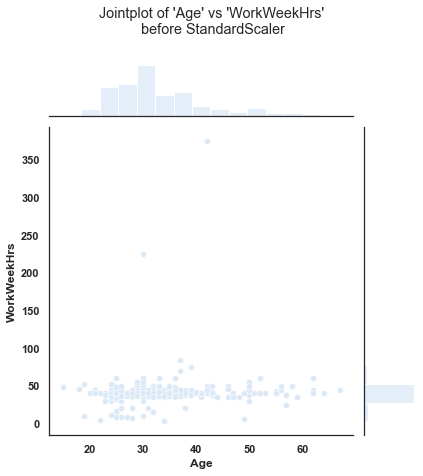

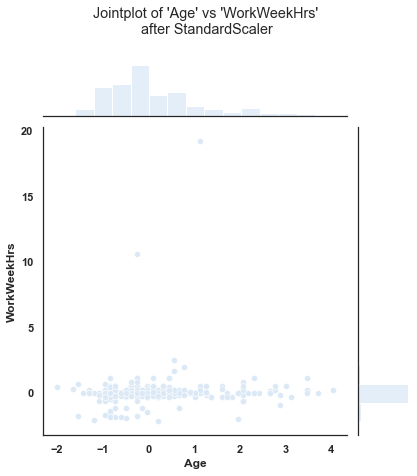

In [117]:
# visualize effects of StandardScalar
num_points_to_plot = 300

#plt.style.use('classic')

sns.jointplot(data=X_train[:num_points_to_plot], x="Age",
              y="WorkWeekHrs", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'Age' vs 'WorkWeekHrs' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=X_train_scaled[:num_points_to_plot], x="Age",
              y="WorkWeekHrs", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'Age' vs 'WorkWeekHrs' \nafter StandardScaler", y=1.1)

plt.savefig('plots/07-visualize effects of StandardScalar.png', bbox_inches='tight')


StandardScaler does not change the structure of the data itself but the axes get shifted and scaled.

# Logistic Regression Classifer Model
**Combine sequential operations with Pipeline.**

In [118]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [119]:
# check the name of each step of model
model.named_steps


{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [120]:
# time to fit model
start = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start
elapsed_time


0.052700042724609375

In [121]:
# predict y given a test set
predicted_target = model.predict(X_test)
predicted_target[:5]


array([1, 1, 1, 1, 1])

In [122]:
# check the score of the predictive pipeline 
model_name = model.__class__.__name__
score = model.score(X_test, y_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")


The accuracy using a Pipeline is 0.691 with a fitting time of 0.053 seconds in 11 iterations


In [123]:
# compare to model with unscaled features
model = LogisticRegression()
start = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start


In [124]:
#
model_name = model.__class__.__name__
score = model.score(X_test, y_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")


The accuracy using a LogisticRegression is 0.638 with a fitting time of 0.054 seconds in 26 iterations


**Logistic Regression Classifer Conclusion**  
Scaling data before training a model improved computational performance. Number of iterations and training time decreased.

## Model Validation
* cross-validation

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())


In [126]:
# import numerical data
numerical_columns = ["Age", "Age1stCode", "ConvertedComp", "WorkWeekHrs", "YearsCodePro"]
df[numerical_columns].head()


,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCodePro
0,36.0,12,116000.0,39.0,13
1,22.0,14,32315.0,36.0,4
2,23.0,13,40070.0,40.0,2
3,49.0,42,14268.0,40.0,7
4,53.0,14,38916.0,36.0,20


In [127]:
# cross validation takes a parameter cv that defines the splitting strategy
%time
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, y, cv=5)
cv_result


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


{'fit_time': array([0.058496  , 0.05960989, 0.0560236 , 0.05859828, 0.07263708]),
 'score_time': array([0.00650811, 0.00610495, 0.00538921, 0.00887775, 0.00743604]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [128]:
# extract scores computed on test fold of each cv round
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}"
)


The mean cross-validation accuracy is: 1.000 +/- 0.000


# Random Forest Classifer Model

In [129]:
# set target variable
y = df['JobSat_encode_bin']
# drop target variable from feature df
X = df.drop(['JobSat_encode_bin'], axis=1)


In [130]:
# create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape


((23492, 9), (5874, 9))

In [131]:
# instantiate random forest classifier and fit data
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


In [132]:
%%time
rf_clf.fit(X_train, y_train)


CPU times: user 1.51 s, sys: 60.2 ms, total: 1.57 s
Wall time: 673 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [133]:
# check oob score
rf_clf.oob_score_


0.6973437766048016

In [134]:
# hyperparameter tuning for rf using GridSearchCV and fit data
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [135]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [136]:
# instantiate grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [137]:
%%time
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 4.13 s, sys: 614 ms, total: 4.74 s
Wall time: 3min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [138]:
grid_search.best_score_


0.6973863442874171

In [139]:
rf_best = grid_search.best_estimator_
rf_best


RandomForestClassifier(max_depth=10, min_samples_leaf=100, n_estimators=30,
                       n_jobs=-1, random_state=42)

BEST ESTIMATOR
* max_depth = 3
* min_samples_leaf=5 
* n_estimators=200

**Visualize Random Forest**


In [140]:
from sklearn.tree import plot_tree


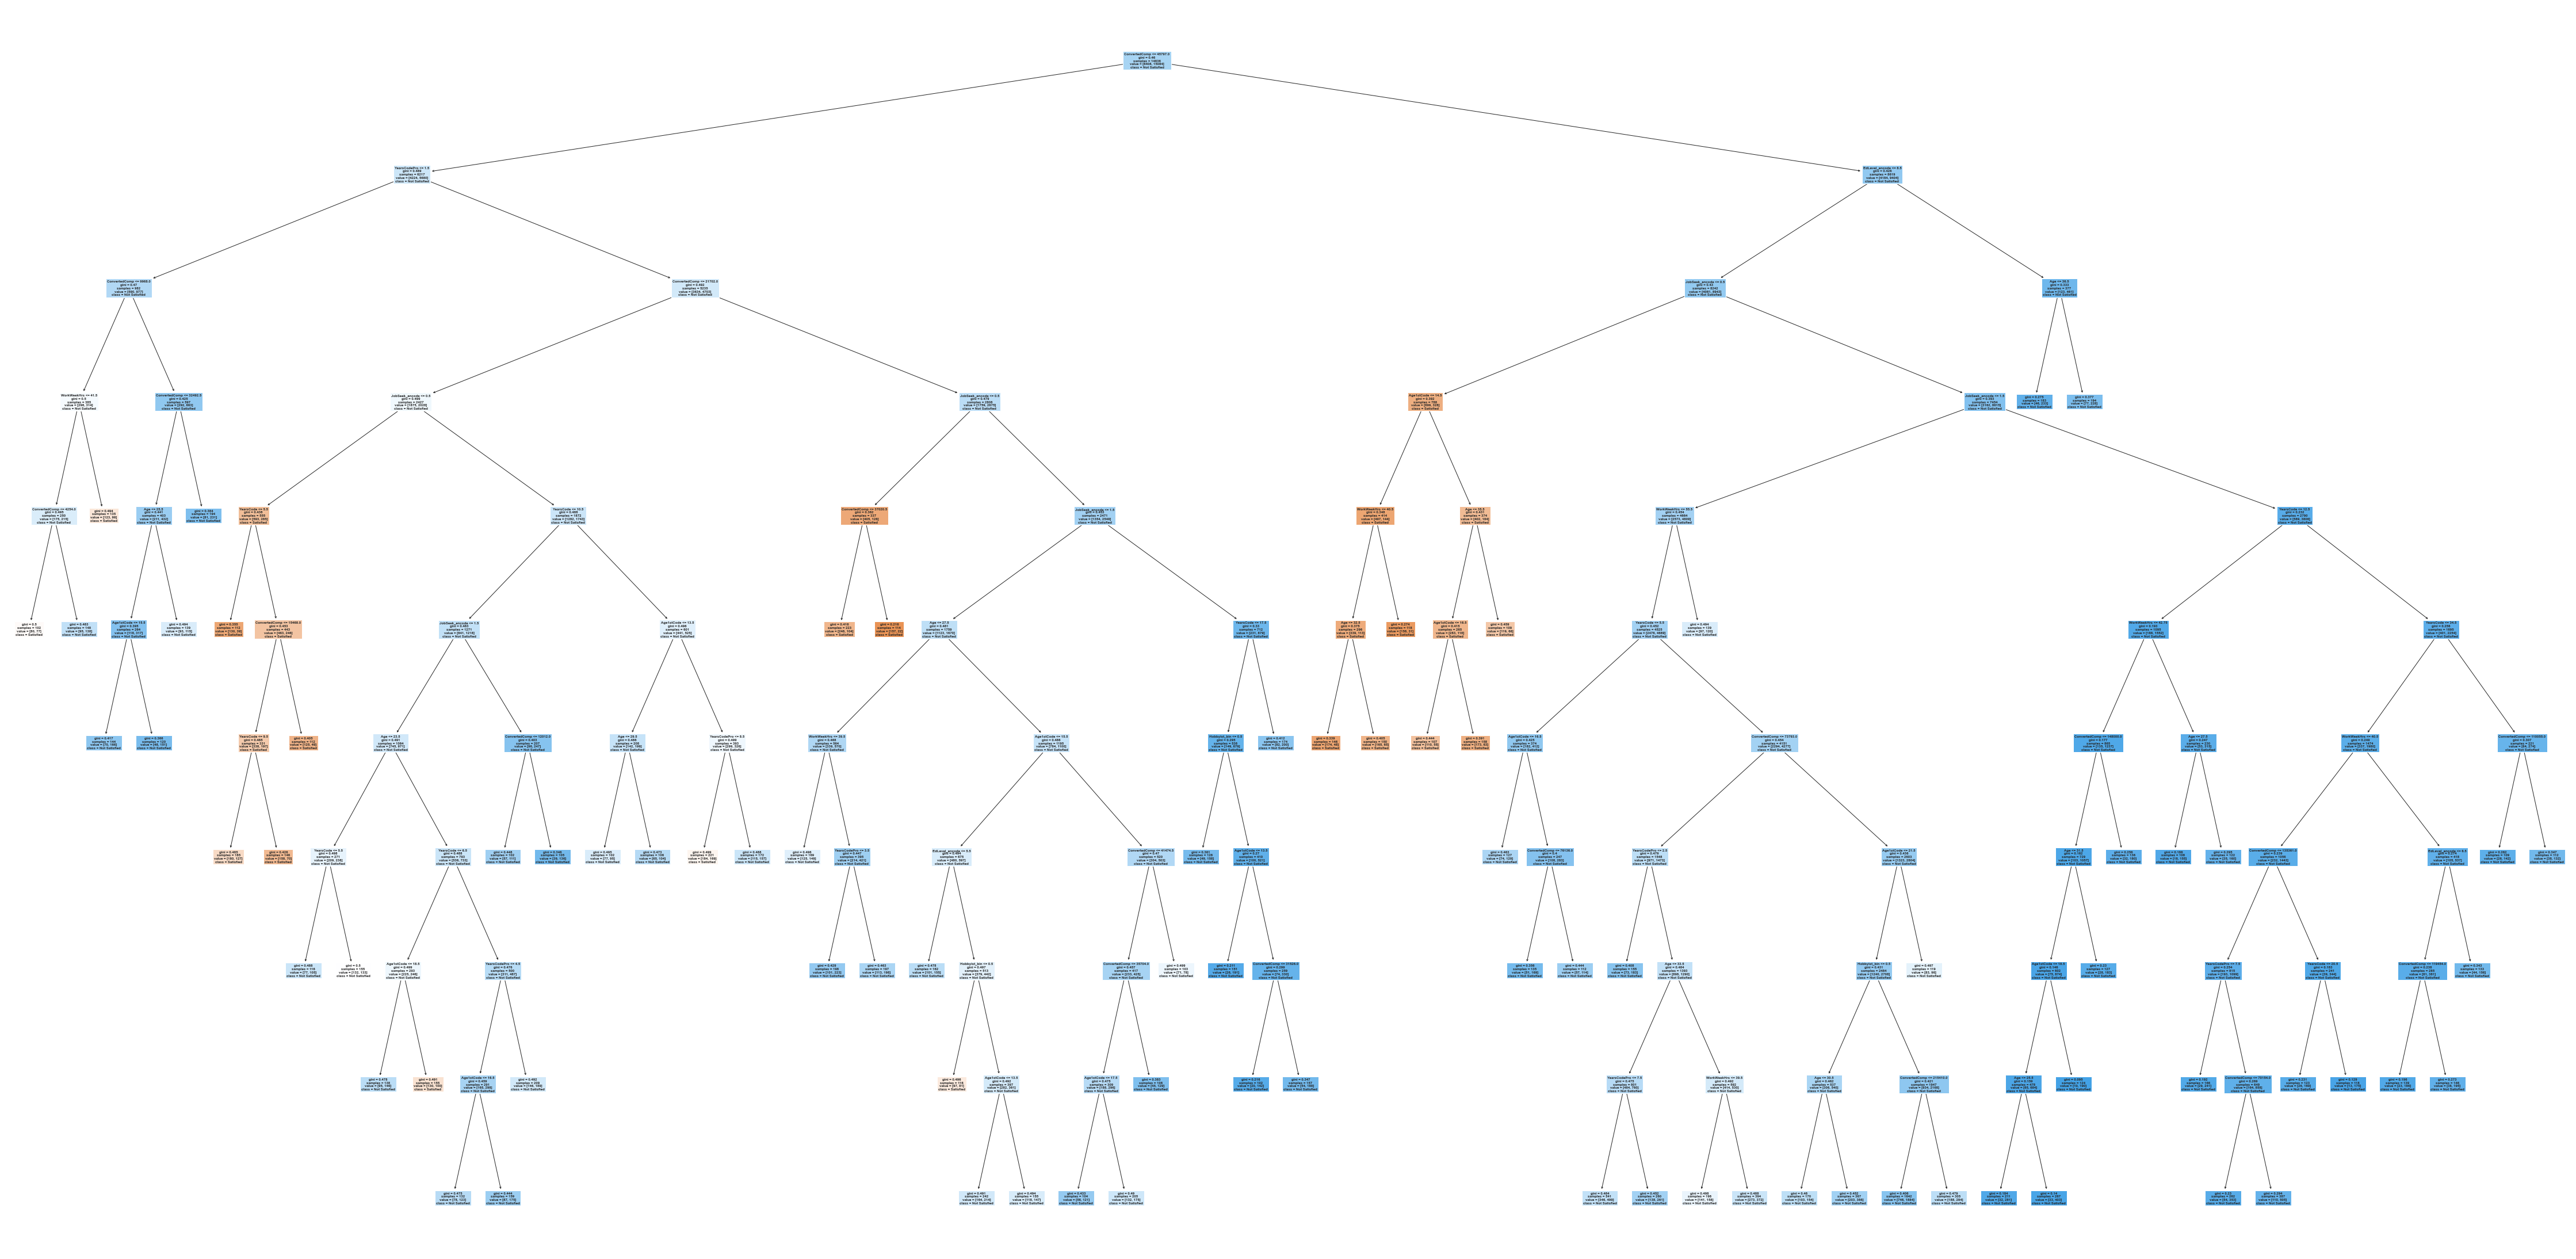

In [141]:
# plot trees
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Satisfied', 
                                                                         "Not Satisfied"],filled=True);

plt.savefig('plots/08-plot-random-forest-trees.png', bbox_inches='tight')


In [142]:
# sort data by feature importance
rf_best.feature_importances_


array([0.02993579, 0.02307694, 0.13044858, 0.01751489, 0.02243876,
       0.01932877, 0.00519621, 0.00878718, 0.74327287])

In [143]:
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_best.feature_importances_
})


In [144]:
feat_imp = imp_df.sort_values(by="Importance", ascending=False).reset_index(drop=True)
feat_imp


,Feature,Importance
0,JobSeek_encode,0.743273
1,ConvertedComp,0.130449
2,Age,0.029936
3,Age1stCode,0.023077
4,YearsCode,0.022439
5,YearsCodePro,0.019329
6,WorkWeekHrs,0.017515
7,EdLevel_encode,0.008787
8,Hobbyist_bin,0.005196


**Random Forest Model Conclusion**  
Job seeking & Worker Compensation features are more indicative of job satisfaction than other features.


<a id='Conclusions'></a>
## Conclusion For All Questions


**Q1**  

**Age Distribution Conclusion**
* Mean Age is slightly higher for developers.

**Compensation Conclusion**
* Average data roles pay 15% more than Dev roles.

**Education Conclusion**
* College degrees are very common among both data and developer roles.
* Bachelor's degrees dominate among developers while post-graduate degrees are twice as common for data roles.


**Q2**  

**Job Satisfaction by Role**  
* Data Role: 64% satisfied, 36% not satisfied  
* Dev Role: 63% satisfied, 37% not satisfied

**Work Week Hours Conclusion**
* Mostly follows a normal curve but with some extreme outliers, possibly indicating respondent's feeling of extreme work or over-work.

**Q3**  

**Logistic Regression Classifer Conclusion**  
* Scaling data before training a model improved computational performance. Number of iterations and training time decreased.

**Random Forest Model Conclusion**  
* Job seeking & Worker Compensation features are more indicative of job satisfaction than other features.
